In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
from urllib2 import Request, urlopen
import json
from datetime import date, datetime
import matplotlib.dates as mdates
import ast
import os.path
from glob import glob
from datetime import datetime
import pytz

In [5]:
#Read JSON file as a panda's dataframe
"""jsonFile = "DiscordScrapes/LightinDarkness/Light in Darkness_general_1.json"
data = pd.read_json(jsonFile)"""

In [2]:
#Data will not include channels that are restricted to only admins for posting privilidges
data = []
#For now, just include all json files
pattern = os.path.join('DiscordScrapes/Mathematics/', '*.json')
for file_name in glob(pattern):
    #print file_name
    data.append(json.load(open(file_name)))
#Combine data


#For better idea about data, view: https://dht.chylex.com/build/viewer.html


In [3]:
#Reading data through

#Message data
messageData = []


#UID associated with name
"""
      "UID": {
        "name": Name
      },
"""
userList = []

#List of UIDs. Index if mentioned in 'u' in messages
"""
Ex:
      "384741477567430657": {
        "u": 13,
        "t": 1511799916403,
        "m": "https://i.imgur.com/Jud77MH.png",
        "e": [
          {
            "url": "https://imgur.com/Jud77MH",
            "type": "image"
          }
        ]
      },
"""
userIndex = []


#Channel Info
"""
      "UID of Channel": {
        "server": _IndexNumber_,
        "name": Name
      }
"""
channelInfo = []

In [4]:
for item in data:
    for majorkey, subdict in item.iteritems():
        if majorkey == "data":
            messageData.append(subdict)

        if majorkey == "meta":
            for majorkey2, subdict2 in subdict.iteritems():
                if majorkey2 == "users":
                    userList.append(subdict2)
                if majorkey2 == "userindex":
                    userIndex.append(subdict2)
                if majorkey2 == "servers":
                    channelInfo.append(subdict2)

In [142]:
#messageData


[{u'346311784791277579': {u'346315047426981888': {u'f': 1,
    u'm': u"---------------------------------------------------\n***What's the <#346311784791277579>?***\n---------------------------------------------------\nWelcome to the donators leaderboard! It is here you will find a leaderboard of our top monthly/one time donators who have contributed to assisting the server. Want to donate yourself, and get on the leaderboard/receive perks? Check out the patreon, and one time donation paypal following these links;\n\n<https://www.patreon.com/lightindarkness>\n<https://www.paypal.me/lightindarkness> (Please use Goods, and services but do NOT add your shipping address!)\n\n---------------------------------------------------\n***The leaderboard lists are as follows;***\n---------------------------------------------------\n-Combined patreon & 1 time leaderboard\n-Patreon supporter leaderboard\n-1-time support leader",
    u't': 1502638341529,
    u'u': 0},
   u'346315568837689344': {u'f': 1

In [5]:
#Timestamps are in epoch time
timestamps = []
message = []
messageID = []
author = []

#author ID = index associated with userIndex
authorID = []
authorName = []

#Not a priority RN but collect anyways
imageData = []

#Convert lists to dictionaries
"""messageData2 = json.dumps(messageData)[0]
userList2 = json.dumps(userList)[0]
userIndex2 = json.dumps(userIndex)[0]
channelInfo2 = json.dumps(channelInfo)[0]

messageData3 = json.dumps(messageData)
userList3 = json.dumps(userList)
userIndex3 = json.dumps(userIndex)
channelInfo3 = json.dumps(channelInfo)

messageData4 = ast.literal_eval(messageData3)
userList4 = ast.literal_eval(userList3)
userIndex4 = ast.literal_eval(userIndex3)
channelInfo4 = ast.literal_eval(channelInfo3)"""

'messageData2 = json.dumps(messageData)[0]\nuserList2 = json.dumps(userList)[0]\nuserIndex2 = json.dumps(userIndex)[0]\nchannelInfo2 = json.dumps(channelInfo)[0]\n\nmessageData3 = json.dumps(messageData)\nuserList3 = json.dumps(userList)\nuserIndex3 = json.dumps(userIndex)\nchannelInfo3 = json.dumps(channelInfo)\n\nmessageData4 = ast.literal_eval(messageData3)\nuserList4 = ast.literal_eval(userList3)\nuserIndex4 = ast.literal_eval(userIndex3)\nchannelInfo4 = ast.literal_eval(channelInfo3)'

In [6]:
#Analyze message data
#print type(messageData4)

#Get message, userIndex, timestamp, and image data
for a in messageData:   
    for b in a:

        for c in a[b]:
            temp = a[b][c]
            #print type(a[b][c])
            for key, value in temp.iteritems():
                if key == "m": 
                    message.append(value)
                if key == "u":
                    authorID.append(value)
                if key == "t":
                    timestamps.append(value)
                if key =="e":
                    imageData.append(value)
            """for d in a[b][c]:
                print a[b][c]
                #print d
                #temp = map(str, d)
                #print type(temp)
                #print temp[2]
                #if temp == 'm':

                """
            

        #authorID.append(userList)

print "Number of messages: " + str(len(message))
print len(authorID)
print len(timestamps)


            
"""for key, value in messageData.iteritems():
    for key2, value2 in messageData.iteritems():
        print key2"""

Number of messages: 585785
585785
585785


'for key, value in messageData.iteritems():\n    for key2, value2 in messageData.iteritems():\n        print key2'

In [7]:
#Map user ID to real name
"""print type(userList)
print userList"""
"""print userIndex
print type(userIndex)"""
userIndex2 = []
authorName = []
realIDs = []
time_referential = []
firstpost = []

for i in userIndex:
    userIndex2 = userIndex2 + i
print len(userIndex2)
userList2 =[]

for i in userList:
    userList2 = dict(userList2, **i)

print len(userList2)

"""#Match first_date of post with index of authorName
for index in userIndex2:
    timestamps2 = []
    authorID2 = []
    message2 = []
    realID = index
    #Search for first post:
    minValue = 9999999999
    for a in messageData:   
        for b in a:
            for c in a[b]:
                temp = a[b][c]
                #print type(a[b][c])
                for key, value in temp.iteritems():
                    if key == "m": 
                        message2.append(value)
                    if key == "u":
                        authorID2.append(value)
                    if key == "t":
                        timestamps2.append(value)
                        if value < min:
                            minValue = value
    for 
    time_referential.append()"""

#Find name associated with ID
for index in authorID:
    #print index
    realID = userIndex2[index]
    realIDs.append(realID)
    #print realID
    #print userList2[realID]
    authorName.append(userList2[realID]["name"])
    #firstpost.append(time_referential[index])
    
#Note there are repeats in authorName so that you can directly associate it with the correct message_____

print len(authorName)




#From first data set. Should be bigger when all json files are added together
"""30300
30300
30300"""

8030
2932
585785


'30300\n30300\n30300'

In [8]:
print "Number of users: " + str(len(userList2))

Number of users: 2932


2017-01-11 23:51:03.610000
2017-11-30 00:45:32.564000


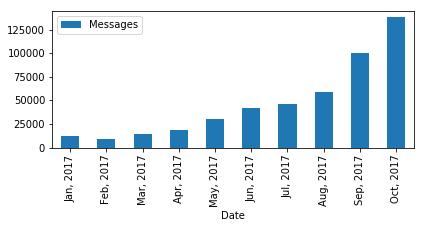

In [13]:
#Timeseries for amount of messages
#Taking out the first ___ rows since messages weren't collected at that time. 

df = pd.DataFrame({'Date':timestamps})
df['count'] = 1
#print df

#Convert timestamps after pandas https://stackoverflow.com/a/34669712/4698963

#Count per month
df['Date'] = pd.to_datetime(df['Date'],unit='ms')

#df.sort_values(by='Date') 
df.index = df['Date']
del df['Date']
print df.index.min()
print df.index.max()



#Find Max + Reset Index (so that I can reassign column names)
gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Messages"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']
gb = gb.reindex(columns=["Date", "Messages"])

#Remove November Data for consistency:
gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 11)]

ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig('MathematicsMessagesBar_Month.png')



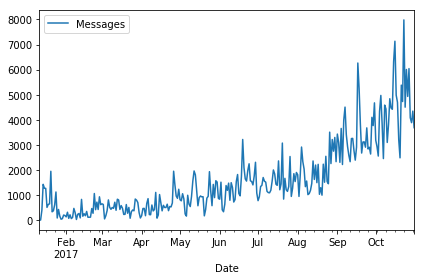

In [14]:
#Bar all
df = pd.DataFrame({'Date':timestamps})
df['count'] = 1

#Date time
df['Date'] = pd.to_datetime(df['Date'],unit='ms')

#Remove November Data for consistency:
df = df[(df['Date'].dt.year != 2017) | (df['Date'].dt.month != 11)]

#Reindex then delete
df.index = df['Date']
del df['Date']

df.columns = ["Messages"]
df.groupby(level=0).count()
df.resample('D').sum()
retweets = df.resample('D').sum().plot()
plt.tight_layout()
retweetsImage = retweets.get_figure()
retweetsImage.savefig('MathematicsMessagesLine.png')

In [12]:
df = pd.DataFrame({'date':timestamps, 'user':authorName, 'user_id': realIDs})
df['date'] = pd.to_datetime(df['date'],unit='ms')
df['count'] = 1

gb = df.groupby("user")["count"].agg({'count':sum})
#gb = df.groupby("user")["count"].sum()

#gb = gb.reset_index(drop=True)
#gb.columns = ["User","Count"]
#print gb
gb= gb.sort_values("count")
gb["ones"]=1
print gb
gb.to_csv("MathematicsUserPosts.csv", sep='\t', encoding = 'utf-8')

#Great graph info: https://stackoverflow.com/a/29499109/4698963
#print gb.plot(kind='bar')

#TODO
#Group by 1000s
#How many users per 1000s count
#Number of messages vs. Number of users
#Not sure how to do this rn


                       count  ones
user                              
Brezzoff                   1     1
hotdog dingdong            1     1
ancientclaw                1     1
looeyshroomz               1     1
dwd                        1     1
Super Servine              2     1
Toneks                     2     1
Wojtek                     2     1
pseudomera                 2     1
Rodgerwilco                2     1
Dae-Glyth                  2     1
screbuts                   2     1
DragunityMAX               3     1
WilsonsSFC                 3     1
DeadassUnMute{Kachow}      3     1
Jonathan                   3     1
Potato                     3     1
TheSupreme                 3     1
YumYum                     3     1
✧Gamercrew999✧             3     1
Notice me                  3     1
Mythos                     3     1
Bomel                      3     1
🎅Bunnies🎅                  3     1
LegitToxic                 3     1
BenjiDurden                3     1
hintss              

                        Date  count2
0    2017-11-03 07:38:43.187      18
1    2017-10-24 21:23:43.383       7
2    2017-09-30 20:28:09.676     261
3    2017-11-03 07:50:58.652       9
4    2017-09-17 20:53:09.484      80
5    2017-10-15 11:59:46.905     175
6    2017-11-26 22:47:45.606     373
7    2017-10-13 01:28:25.893    2083
8    2017-09-30 23:57:33.902      34
9    2017-11-14 18:16:33.554      60
10   2017-11-27 15:53:16.975     112
11   2017-10-09 07:31:33.499     220
12   2017-10-28 11:52:43.650     532
13   2017-10-15 06:23:17.704     576
14   2017-10-28 12:16:31.907     268
15   2017-10-31 02:53:02.980      33
16   2017-09-17 21:26:26.837     581
17   2017-11-13 12:33:04.443      28
18   2017-11-10 17:33:44.037      38
19   2017-10-18 16:11:33.350       8
20   2017-11-28 17:34:01.001      13
21   2017-11-18 17:13:50.490     549
22   2017-10-16 02:46:12.926     523
23   2017-10-10 16:10:55.295      68
24   2017-11-03 08:20:25.794      85
25   2017-09-28 15:45:07.707    6816
2

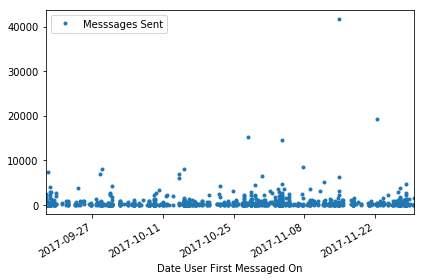

In [27]:
#Scattergraph
#Numer of posts over time
#Compares Time of user to amount of posts
#Join time by months?

#Get date, user, user id
df = pd.DataFrame({'date':timestamps, 'user':authorName, 'user_id': realIDs})
df['Date'] = pd.to_datetime(df['date'],unit='ms')
df['count'] = 1

#https://stackoverflow.com/questions/23394476/keep-other-columns-when-using-min-with-groupby

#Find first post for each user
#gb = df.groupby('user')["Date"].min()
#print len(gb)
#print df

#Add users posts together as an aggregate count of their posts
gb2 = df.groupby(["user"])["count"].agg({'count':sum})
#print len(gb2)

#Group together data
gb2 = gb2.reset_index(drop=True)
gb2['timestamps'] = df['date']
gb2['Date'] = pd.to_datetime(df['date'],unit='ms')
gb2["count2"] = gb2["count"]
del gb2['timestamps']
del gb2["count"]
print gb2

#Group by month and average the amount of posts per time referential
#del bigdata["user"]
#bigdata.index = bigdata['Date']

#print gb2
gb2.columns = ["Date User First Messaged On","Messsages Sent"]
retweets = gb2.plot(x="Date User First Messaged On", y="Messsages Sent", style=".")
plt.tight_layout()
plt.savefig('MathematicsMessagesSentScatter.png')
#my_scatter = pd.scatter_matrix(bigdata, diagonal="kde")

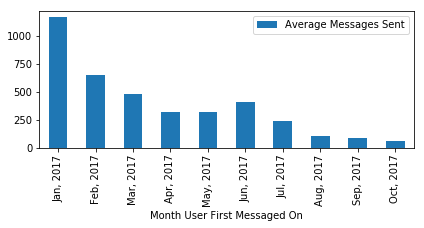

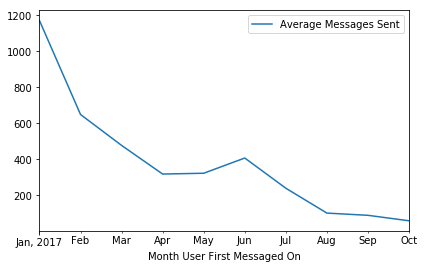

In [19]:
#Time referential graph vs average number of posts
#Compares Time of user to amount of posts
#Join time by months?

#Get date, user, user id
df = pd.DataFrame({'date':timestamps, 'user':authorName, 'user_id': realIDs})
df['Date'] = pd.to_datetime(df['date'],unit='ms')
df['count'] = 1

#https://stackoverflow.com/questions/23394476/keep-other-columns-when-using-min-with-groupby

#Find first post for each user
gb = df.groupby('user')["Date"].min()
#print len(gb)
#print df

#Add users posts together as an aggregate count of their posts
gb2 = df.groupby(["user"])["count"].agg({'count':sum})
#print len(gb2)

#Group together data
bigdata = pd.concat([gb, gb2], axis=1)
bigdata = bigdata.reset_index(drop=True)
#print bigdata
#print bigdata

#Remove November Data for consistency:
bigdata = bigdata[(bigdata['Date'].dt.year != 2017) | (bigdata['Date'].dt.month != 11)]

#Group by month and average the amount of posts per time referential
#del bigdata["user"]
bigdata.index = bigdata['Date']
gb3 = bigdata.groupby([(bigdata.index.year),(bigdata.index.month)]).mean().reset_index()
#print gb3

gb3.columns = ["Year", "Month", "Average Messages Sent"]
gb3['Month User First Messaged On'] = gb3[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb3['Month User First Messaged On'] = pd.to_datetime(gb3['Month User First Messaged On'])
del gb3['Year']
del gb3['Month']

#Bar
ax = gb3.set_index('Month User First Messaged On').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb3['Month User First Messaged On'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig('MathematicsTimeRefVsAveragePostsBar.png')



#Line
ax = gb3.set_index('Month User First Messaged On').plot()
plt.tight_layout()
ax.set_xticklabels(gb3['Month User First Messaged On'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig('MathematicsTimeRefVsAveragePostsLine.png')

#Find time_referential = start date of posting

In [ ]:
#Average number of posts per user vs Time started
#Time

585785
(11748, 5)
(9370, 5)
(14703, 5)
(18989, 5)
(30241, 5)
(42505, 5)
(46353, 5)
(59384, 5)
(100828, 5)
(138385, 5)
(113279, 5)
asdfadsfds
(236, 5)
(172, 5)
(248, 5)
(340, 5)
(460, 5)
(572, 5)
(590, 5)
(620, 5)
(726, 5)
(714, 5)
(441, 5)
asdfasdfasdfa
(5119, 5)


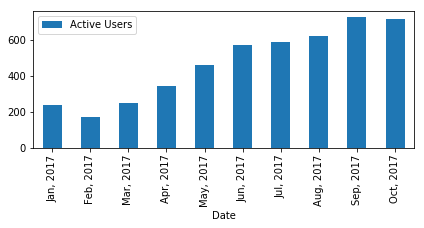

In [17]:
#Number of active users per month

print len(realIDs)

#active user = user who posts at least once
df = pd.DataFrame({'date':timestamps, 'messages':message, 'user':authorName, 'user_id': realIDs})
df['Date'] = pd.to_datetime(df['date'],unit='ms')
df['count'] = 1
df.index = df['Date']
del df['date']

#Sort
df.sort_values(by='Date')
#print df
"""#Seperate dataframe into months so that you can remove duplicates later

#Group by month for number of active users
gb = df.groupby([(df.index.year),(df.index.month)])
print gb
"""

#List of dfs by month and year
dfList = []
for region, df_region in df.groupby([(df.index.year),(df.index.month)]):
    #print(len(df_region))
    dfList.append(df_region)
    print df_region.shape
    
print "asdfadsfds"
    

    
#Drop duplicates from timerange https://stackoverflow.com/questions/47341275/pandas-drop-duplicates-within-date-range
#Goal: Drop duplicates within each month
#Alt: drop duplicates for each subset dataframe
#Dropping duplicates so that all users within a month period is unique
#print "asdfasdf"
cleandfList =[]
for dataframe in dfList:
    #Use user_id since users can have the same name!!!
    dataframe = dataframe.drop_duplicates(subset="user_id")
    #print len(dataframe)
    print dataframe.shape
    cleandfList.append(dataframe)


print "asdfasdfasdfa"
#Combine dataframes
bigDF = pd.concat(cleandfList)
print bigDF.shape
#print len(bigDF)
del bigDF['messages']
del bigDF['user']
del bigDF['user_id']
bigDF.index = bigDF['Date']
#print bigDF

#Count total of active users by months
gb = bigDF.groupby([(bigDF.index.year),(bigDF.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Active Users"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']

#Remove November Data for consistency:
gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 11)]

#Graph
ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig('MathematicsActiveUsers.png')


   Message Length       Date
0       43.088441 2017-01-01
1       42.755283 2017-02-01
2       40.107325 2017-03-01
3       34.432882 2017-04-01
4       33.953970 2017-05-01
5       35.226303 2017-06-01
6       37.972343 2017-07-01
7       36.838542 2017-08-01
8       34.903886 2017-09-01
9       33.538628 2017-10-01


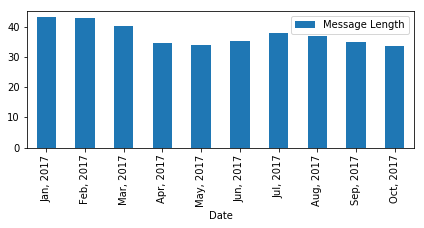

In [21]:
#Length of messages (aggregate average)

#TODO: NEED TO DO COHORT ANALYSIS

#Get messages + timestamps
df = pd.DataFrame({'date':timestamps, 'messages':message})
df['Date'] = pd.to_datetime(df['date'],unit='ms')

#Find length of each post
df['length'] = df['messages'].str.len()
#df['count'] = 1
del df["messages"]
del df["date"]
df.index = df['Date']
#print df

#Find Average + Reset Index (so that I can reassign column names)
gb = df.groupby([(df.index.year),(df.index.month)]).mean().reset_index()
gb.columns = ["Year", "Month", "Message Length"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']

#Remove November Data for consistency:
gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 11)]

#Graph
ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig('MathematicsTimeAverageLength.png')

print gb

In [22]:
#Word Cloud
#idk what I'm doing. Gonna just do: https://github.com/amueller/word_cloud
import unicodedata

#Just get txt file I guess
with open("MathematicsListofMessages.txt", "w") as output:
    for item in message:
        temp = unicodedata.normalize('NFKD', item).encode('ascii','ignore')
        output.write(temp)